# Aggregates

## Calculating Column Statistics

Aggregate functions summarize many data points (i.e., a column of a dataframe) into a smaller set of values.

The following table summarizes some common commands:

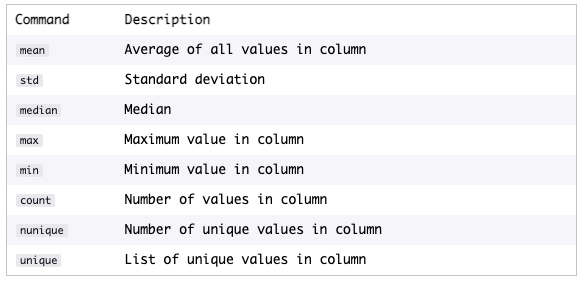

In [1]:
import pandas as pd

orders = pd.read_csv('orders.csv')

most_expensive = orders.price.max()

num_colors = orders.shoe_color.nunique()

In general, we use the following syntax to calculate aggregates:

`df.groupby('column1').column2.measurement()`

Now, they want to know the most expensive shoe for each `shoe_type`.

In [2]:
pricey_shoes = orders.groupby('shoe_type').price.max()

pricey_shoes

shoe_type
ballet flats    481.0
boots           478.0
clogs           493.0
sandals         456.0
stilettos       487.0
wedges          461.0
Name: price, dtype: float64

After using groupby, we often need to clean our resulting data.

As we saw in the previous exercise, the `groupby` function creates a new Series, not a DataFrame. For our ShoeFly.com example, the indices of the Series were different values of `shoe_type`, and the name property was price.

Usually, we’d prefer that those indices were actually a column. In order to get that, we can use `reset_index()`. This will transform our Series into a DataFrame and move the indices into their own column.

Generally, you’ll always see a groupby statement followed by `reset_index`:

`df.groupby('column1').column2.measurement().reset_index()`

In [4]:
pricey_shoes = orders.groupby('shoe_type').price.max().reset_index()

pricey_shoes

,shoe_type,price
0,ballet flats,481.0
1,boots,478.0
2,clogs,493.0
3,sandals,456.0
4,stilettos,487.0
5,wedges,461.0


Sometimes, the operation that you want to perform is more complicated than `mean` or `count`. In those cases, you can use the `apply` method and lambda functions, just like we did for individual column operations. Note that the input to our lambda function will always be a list of values.

A great example of this is calculating percentiles. Suppose we have a DataFrame of employee information called df that has the following columns:

- `id:` the employee’s id number
- `name:` the employee’s name
- `wage:` the employee’s hourly wage
- `category:` the type of work that the employee does